# Keras: https://keras.io/api/layers/activations/

keras es una bilbioteca con librerias de codigo abierto para entrenar modelos de deep learning DL que puede ejecutarse en TensorFlow. Keras permite construir bloque de arquitectura de la redes neuronales, y permite construir desde un perceptron hasta redes neuronales convolucionales  y recurrentes de una manera amigable con el usuario


# Funciones de activación

Tipos de funciones de activación:

## Lineal:

Una transformación lineal, la cual se muestra en la siguiente figura, consiste, básicamente, en la función identidad, en donde la variable dependiente tiene una relación directa y proporcional con la variable independiente. En términos prácticos, lo anterior significa que una función de activación lineal pasa la señal sin realizar un cambio sobre esta. Este el típo de activación que se usa en la capa de entrada de las redes neuronales.


## Sigmoide:
Como todas las transformaciones logística, las sigmoides puede reducir la cantidad de valores extremos o outliers en los datos sin eliminarlos. En la siguiente figura se ilustra dicha función sigmoide:

Una función sigmoide convierde una variable independiente de rango infinito en probabilidades con un rango entre 0 y 1. La mayoria de las salidas serán cercanas a 0 o 1, que corresponden a zonas de saturación.

La función de activación sigmoide devuelve una probabilidad independiente para cada clase.



##  Tanh
Corresponde a una función trigronométrica hiperbólica,a diferencia de la función sigmoide, el rango de salida de tanh varía entre -1 y 1. La ventaja de tanh es puede tratar los números negativos de forma más eficiente que la función sigmoide.


## ReLU: Rectified Linear Unit (Unidad Rectificadad Lineal)
La unidad rectificada lineal es una trasformación más intersante que activa un nodo solo si la entrada se encuentra por encima de cierta cantidad. Si la entrada está por debajo de zero, la salida es cero, pero si la entrada alcanza un valor umbral, la salida tiene una relación lineal con la variable dependiente 

Las funciones de activaciones ReLU represetan actualmente el estado de arte en la aplicación de funciones de activación, ya que han demostrado un buen desempeño en diferentes situaciones. Dado que el gradiente de la ReLU es cero o constante, permite evitar el problema del desvanecimiento del gradiente. Las funciones de activación ReLu han demostrado un mejor entrenamiento en la práctica que las funciones de activación sigmoidea.

Las funciones de activación ReLU se usan, normalmente, en las capas ocultas.

Existen mas funciones de activación, no obstante, nos centraremos a continuación en la descrisición de una función de activación usada en la capa de salida para la clasificación multiclase mediante una red neuronal, conocida como Softmax.


## Softmax
La función de activación Softmax representa una generalización de la regresión logística en el sentido que puede ser apllicada a un conjunto continues de datos (en lugar de una clasificación binaria) y puede contener múltiples fronteras de desición. Esta función maneja sistemas multinomiales para el etiquetado. Softmax es una función que normalmente se usa en la capa de salida de un clasificador.

La función de activación Softmax devuelve la distribución de probablilidades de clases mutuamente excluyentes.

Consideremos el siguiente ejemplo en donde se ilustra, entre otra cosas la definición de la función SoftMax:

$S(y_i)=\frac{e^y_i}{\sum e^{y_i}}$


En deep learning, el térno capa logit se usa para la última capa de neuronas de la red neuronal para el problema de clasificación que produce unos valores de predicción "crudos" de valores reales que varian en el intervalo . En concreto, las cantidades logits son los puntajes crudos de la ultima capa de la red neuronal, antes de que se les aplique la activación.


Ref: https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S07_Funciones_Activacion_Arquitectura_Red.ipynb

In [ ]:
import numpy as np
from tensorflow import keras


In [ ]:
# 1: A través de una capa medidante el método Activación:
modelA = keras.models.Sequential()
modelA.add(keras.layers.Dense(32, input_shape=(16,)))
modelA.add(keras.layers.Activation('relu'))#  Capa activación
modelA.add(keras.layers.Dense(64))
modelA.add(keras.layers.Activation('tanh'))#  Capa activación
modelA.summary()

In [ ]:
# 2: Mediante el argumento activation
modelB = keras.models.Sequential()
modelB.add(keras.layers.Dense(32, input_shape=(16,)))
modelA.add(keras.layers.Activation('relu'))#  Capa activación
modelB.add(keras.layers.Dense(64, activation='tanh'))
modelB.summary()

In [ ]:
# 3: Mediante una función de Tensor-flow por elementos.
from keras import backend as K
modelC = keras.models.Sequential()
modelC.add(keras.layers.Dense(32, input_shape=(16,)))
modelC.add(keras.layers.Dense(64, activation=K.tanh))
modelC.summary()

In [ ]:
# Relu
import matplotlib.pyplot as plt
x=np.random.uniform(low=-10.0, high=10, size=(2000,))
y=keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)
plt.plot(x,y,'.')

In [ ]:
# tanh
y=keras.activations.tanh(x)
plt.plot(x,y,'.')


In [ ]:
#sigmoid
y=keras.activations.sigmoid(x)
plt.plot(x,y,'.')


In [ ]:
# elu
y=keras.activations.elu(x, alpha=1.0)
plt.plot(x,y,'.')

In [ ]:
# Exponential
y=keras.activations.exponential(x)
plt.plot(x,y,'.')

In [ ]:
# Selu 
y=keras.activations.selu(x)
plt.plot(x,y,'.')

In [ ]:

# Linear
y=keras.activations.linear(x)
plt.plot(x,y,'.')

In [ ]:

y=keras.activations.softplus(x)
plt.plot(x,y,'.')


In [ ]:
y=keras.activations.softsign(x)
plt.plot(x,y,'.')

# Arquitectura y funcionalidad de la Redes neuronales secuenciales:

De las funciones de activación habladas en la clase anterior podemos advertir dos características que deben poseer una red neuronal:

Las funciones de activación de las capas ocultas deben ser funciones de activación no lineales, con el fín de que la red actue como un aproximador universal a una función.

La función de activación de la capa de salida determina el tipo de clasificación/regresión del problema que se pretende solucionar.
Como regla general, se tiene que la función de activación de las capas ocultas puede ser definida como una función ReLU y, dependiendo del problema, podemos definir la función de activación de la capa de salida como:

- Función de activación sigmoide: si el problema de clasificación es binario.
- Función de activación Softmax: si el problema de clasificación es multiclase.
- Función de activación lineal: si el problema se trata de una regresión.

En resumen, en la siguiente figura se ilustran la arquitectura de red de los problemas que pueden presentarse en la clasificación/regresión usando una red neuronal secuencial y las funciones de activación definidas en las capas que la componen.

In [ ]:
# https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S08_Problemas_FFNN.ipynb
# https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S11_DNN.ipynb

In [ ]:
# generación de círculos

# Algunas librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [ ]:
# Creación del modelo
def build_model2(activation="sigmoid", loss="binary_crossentropy"):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(5, input_dim=2, activation="relu"))
    model.add(keras.layers.Dense(1, activation=activation))
    opt = keras.optimizers.SGD(lr=0.01)
    model.compile(loss=loss, optimizer=opt, metrics=["accuracy"])
    return model


# https://developers.google.com/machine-learning/crash-course/classification/accuracy#:~:text=Accuracy%20is%20one%20metric%20for,predictions%20Total%20number%20of%20predictions

In [ ]:
# binary cross entropy:

keras.backend.clear_session()

# Prerprocesado de los datos
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=200, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Laboratorio 
1. Preparar los datos para clasificar los gatos de la red neuronal a través de keras.

In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

In [2]:
data_train= "dataset/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "dataset/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [3]:
xtrain_classes, xtrain, train_label = (
    train_dataset["list_classes"],
    train_dataset["train_set_x"],
    train_dataset["train_set_y"],
)

test_classes, xtest, test_label = (
    test_dataset["list_classes"],
    test_dataset["test_set_x"],
    test_dataset["test_set_y"],
)

In [4]:
xtrain_= np.reshape(xtrain,(209, 64,64,3))/255
xtest_ = np.reshape(xtest,(50, 64,64,3))/255

In [5]:
train_label=np.reshape(train_label,(209,))
test_label=np.reshape(test_label,(50,))

In [6]:
train_label

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
def build_model(xtrain_):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64,64,3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        optimizer='adam', metrics=["accuracy"],loss='binary_crossentropy'
    )
    return model



In [19]:
model=build_model(xtrain_)
#history = model.fit(xtrain_, train_label, validation_data=(xtest_, test_label), epochs=10, verbose=1)
history=model.fit(xtrain_, train_label, validation_data=(xtest_, test_label), epochs=50, verbose=1)

Epoch 1/50
7/7 [==============================] - 3s 226ms/step - loss: 0.6866 - accuracy: 0.6268 - val_loss: 0.7356 - val_accuracy: 0.3400
Epoch 2/50
7/7 [==============================] - 1s 172ms/step - loss: 0.5981 - accuracy: 0.6555 - val_loss: 1.0192 - val_accuracy: 0.3400
Epoch 3/50
7/7 [==============================] - 1s 146ms/step - loss: 0.5622 - accuracy: 0.6555 - val_loss: 0.7594 - val_accuracy: 0.3400
Epoch 4/50
7/7 [==============================] - 1s 178ms/step - loss: 0.5005 - accuracy: 0.6555 - val_loss: 0.7127 - val_accuracy: 0.3600
Epoch 5/50
7/7 [==============================] - 1s 176ms/step - loss: 0.4601 - accuracy: 0.6746 - val_loss: 0.7127 - val_accuracy: 0.4400
Epoch 6/50
7/7 [==============================] - 1s 190ms/step - loss: 0.4189 - accuracy: 0.7943 - val_loss: 0.6369 - val_accuracy: 0.6200
Epoch 7/50
7/7 [==============================] - 1s 182ms/step - loss: 0.3628 - accuracy: 0.8325 - val_loss: 0.5248 - val_accuracy: 0.7800
Epoch 8/50
7/7 [====

In [ ]:
history=_

Train: 1.000, Test: 0.900


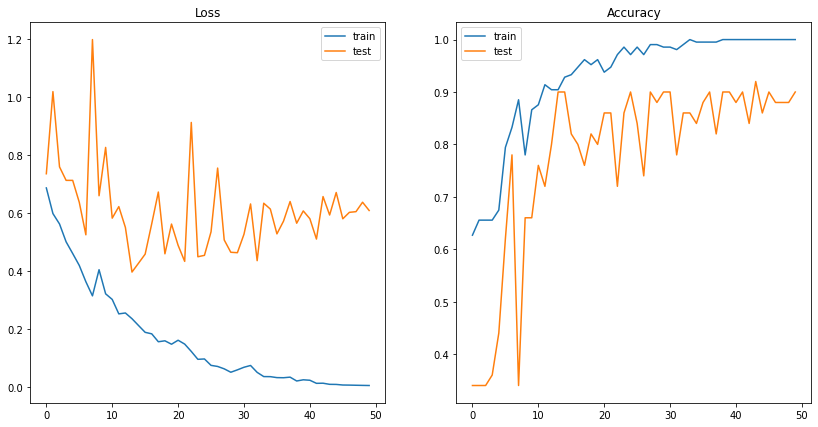

In [20]:
_, train_acc = model.evaluate(xtrain_, train_label, verbose=110)
_, test_acc = model.evaluate(xtest_, test_label, verbose=10)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [21]:
y_pred=(model.predict(xtest_)>0.5).reshape(1,-1)
test_label==1

2/2 [==============================] - 0s 35ms/step


array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False])

In [22]:
(y_pred==(test_label==1)).sum()

45